# Sea Surface Height — NEMO GYRE

Analyse SSH (`sossheig`) from the 2-year GYRE simulation.
- Temporal variance (spatial map)
- Domain-mean SSH time series

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

OUTPUT_DIR = Path("../output")
ds = xr.open_dataset(
    OUTPUT_DIR / "GYRE_10d_00010101_00021230_grid_T_0000.nc", decode_times=False
)
ssh = ds["sossheig"]
ssh

<xarray.DataArray 'sossheig' (time_counter: 72, y: 22, x: 32)> Size: 203kB
[50688 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) float64 576B 4.32e+05 1.296e+06 ... 6.178e+07
    nav_lon       (y, x) float32 3kB ...
    nav_lat       (y, x) float32 3kB ...
Dimensions without coordinates: y, x
Attributes:
    units:               m
    standard_name:       Sea Surface Height
    long_name:           Sea Surface Height
    online_operation:    ave(x)
    interval_operation:  14400.0
    interval_write:      864000.0

## SSH temporal variance

Variance over time at each grid point — highlights regions with the most
sea-level variability (western boundary current).

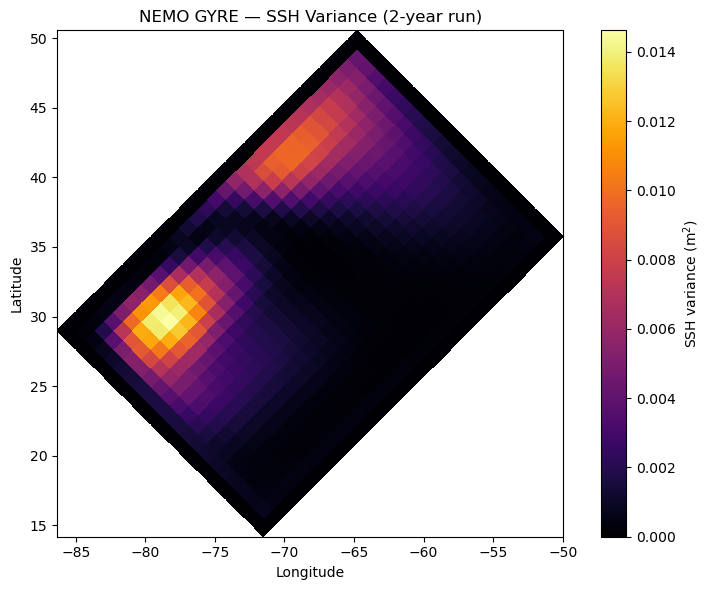

In [2]:
ssh_var = ssh.var("time_counter")

fig, ax = plt.subplots(figsize=(8, 6))
pcm = ax.pcolormesh(
    ds.nav_lon.values, ds.nav_lat.values, ssh_var.values,
    shading="auto", cmap="inferno",
)
fig.colorbar(pcm, ax=ax, label="SSH variance (m$^2$)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("NEMO GYRE — SSH Variance (2-year run)")
ax.set_aspect("equal")
fig.tight_layout()

## Domain-mean SSH time series

Area-averaged SSH over time — shows the spin-up behaviour of the model.

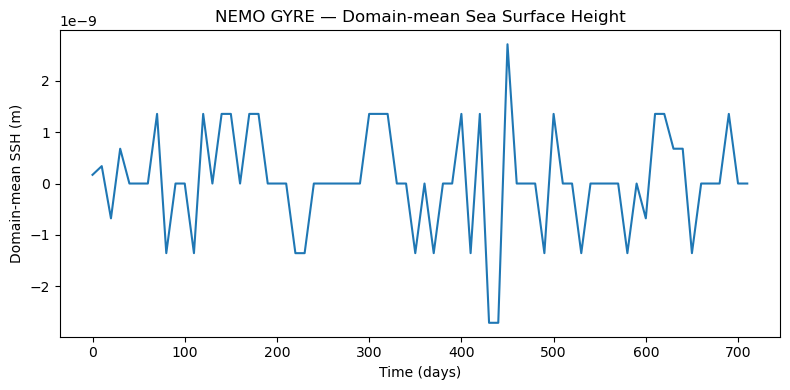

In [3]:
ssh_mean = ssh.mean(dim=["x", "y"])
time_days = (ds.time_counter.values - ds.time_counter.values[0]) / 86400.0

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(time_days, ssh_mean.values)
ax.set_xlabel("Time (days)")
ax.set_ylabel("Domain-mean SSH (m)")
ax.set_title("NEMO GYRE — Domain-mean Sea Surface Height")
fig.tight_layout()